In [1]:
#data element
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
#import pav]cakages necssary
import string
import numpy as np   
# data processing, CSV file I / O (e.g. pd.read_csv) 
import pandas as pd   
import os 
import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences 
from keras.preprocessing.text import Tokenizer 
from keras.models import Model 
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation 
from keras.layers import concatenate, BatchNormalization, Input
from keras.layers.merge import add 
from keras.utils import to_categorical, plot_model 
from keras.applications.inception_v3 import InceptionV3, preprocess_input 
import matplotlib.pyplot as plt  # for plotting data 
import cv2 
from tensorflow.keras.metrics import categorical_accuracy

In [3]:
datset = pd.read_excel("/content/drive/MyDrive/Assignment/dataset 1.xlsx")

In [4]:
DATASET2 = datset.copy()

In [5]:
DATASET2

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg
...,...,...,...,...,...,...
495,S.O.I.E. Black Asymmetric Cape Top,Black will never go out of style. This sheer t...,Polyester,Solid/Plain,Round Neck,/images/pic_495.jpg
496,Multi-Color Striped Modern Dress,This multi-color dress by GAP is crafted in co...,Cotton,Stripes,Round Neck,/images/pic_496.jpg
497,Rose Embroidery Summer White Mini Dress,This white dress by Attic Salt is crafted in p...,Polyester,Printed,Boat Neck,/images/pic_497.jpg
498,Black Solid Dhoti Style Jumpsuit With Belt,"Featuring a dhoti style bottom, this black jum...",Polyester,Solid/Plain,Shoulder Straps,/images/pic_498.jpg


In [6]:
#separarteb from csv
captions = DATASET2[["Description","Image_Path"]]

In [7]:
# splitting  alist to form separate paticulat sentence
for i in range(0,len(captions['Description'])):
  captions['Description'][i] = captions['Description'][i].split(".")
 
 






/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
captions['Description'][0]

['This stylish foil print kurta from janasya is made of poly crepe and comes in an attractive peach color',
 ' It features 3/4 sleeve,round neck,a-line and it is calf length kurta that is suitable for casual occasions',
 ' Team it with matching leggings for a chic look',
 '']

In [9]:
#load description in dictionary format
#captions = DATASET2[["Description","Image_Path"]]


def load_description(text): 
    mapping = dict() 
    for i  in range(0,len(text)): 
        img_id = list(text['Image_Path'][i].split("."))[0].split("/")[2]
         # name of the image 
        img_des = text['Description']              # description of the image 
        if img_id not in mapping: 
            mapping[img_id] = list() 
        mapping[img_id].append(img_des[i]) 
    return mapping 


In [10]:
descriptions = load_description(captions)
print(descriptions['pic_1'])


[['This check pattern top by Work Label is crafted in cotton', ' Featuring a bias check at the yoke and straight check pattern in bottom half, a smart round Neckline, 3/4th sleeves, this mid hip length top offers a stylish & comfortable fit', ' Style this top with a trouser/skirt and medium high heels for chic look at work', ' This top can also be styled with a pair of stud earrings and a pair your regular sneakers to attain a casual look', '']]


In [11]:

for i in descriptions['pic_1']:
  print(i)


['This check pattern top by Work Label is crafted in cotton', ' Featuring a bias check at the yoke and straight check pattern in bottom half, a smart round Neckline, 3/4th sleeves, this mid hip length top offers a stylish & comfortable fit', ' Style this top with a trouser/skirt and medium high heels for chic look at work', ' This top can also be styled with a pair of stud earrings and a pair your regular sneakers to attain a casual look', '']


In [12]:
##remove double list to single list

for i in range(0,500):
  for j in descriptions['pic_' + str(i)]:
    descriptions['pic_' + str(i)] = j
  

In [13]:
#remove empty string in a list
for i in range(0,500):
  while '' in descriptions['pic_' + str(i)]:
    descriptions['pic_' + str(i)].remove('')

In [14]:
print(descriptions['pic_1'])

['This check pattern top by Work Label is crafted in cotton', ' Featuring a bias check at the yoke and straight check pattern in bottom half, a smart round Neckline, 3/4th sleeves, this mid hip length top offers a stylish & comfortable fit', ' Style this top with a trouser/skirt and medium high heels for chic look at work', ' This top can also be styled with a pair of stud earrings and a pair your regular sneakers to attain a casual look']


In [15]:
def clean_description(desc): # clean the text to remove lowercase ,punctation
    for key, des_list in desc.items(): 
        for i in range(len(des_list)): 
            caption = des_list[i] 
            caption = [ch for ch in caption if ch not in string.punctuation] 
            caption = ''.join(caption) 
            caption = caption.split(' ') 
            caption = [word.lower() for word in caption if len(word)>1 and word.isalpha()] 
            caption = ' '.join(caption) 
            des_list[i] = caption 

In [16]:
clean_description(descriptions)

In [17]:
descriptions['pic_1']

['this check pattern top by work label is crafted in cotton',
 'featuring bias check at the yoke and straight check pattern in bottom half smart round neckline sleeves this mid hip length top offers stylish comfortable fit',
 'style this top with trouserskirt and medium high heels for chic look at work',
 'this top can also be styled with pair of stud earrings and pair your regular sneakers to attain casual look']

In [ ]:
pic

'pic_0.jpg'

In [18]:
def to_vocab(desc): #vocsabulary
    words = set() 
    for key in desc.keys(): 
        for line in desc[key]: 
            words.update(line.split()) 
    return words 
vocab = to_vocab(descriptions)

In [19]:
vocab

{'overlapping',
 'buckle',
 'teagatherings',
 'fablestreet',
 'absolutely',
 'sage',
 'if',
 'dance',
 'combinations',
 'signature',
 'story',
 'zip',
 'patch',
 'messy',
 'black',
 'espadrilles',
 'poly',
 'seasoned',
 'wearing',
 'hemp',
 'comes',
 'ways',
 'cinch',
 'handloom',
 'moss',
 'elevate',
 'wrong',
 'notch',
 'backhook',
 'sleeves',
 'light',
 'designed',
 'buttons',
 'tarun',
 'material',
 'blouse',
 'jompers',
 'fine',
 'tieups',
 'never',
 'embellishment',
 'sweat',
 'teameetings',
 'shades',
 'oneofakind',
 'mustard',
 'weddings',
 'quarter',
 'get',
 'feature',
 'tea',
 'not',
 'absorbent',
 'thick',
 'rich',
 'rising',
 'biba',
 'antipill',
 'lidetachable',
 'day',
 'tiered',
 'mobile',
 'cum',
 'coming',
 'stains',
 'small',
 'cuff',
 'mornings',
 'got',
 'upgrade',
 'feminine',
 'snuggly',
 'sweater',
 'also',
 'palazzos',
 'jumpsuit',
 'thigh',
 'cardigan',
 'zipon',
 'lasting',
 'detachable',
 'respite',
 'sunrise',
 'floral',
 'slip',
 'fringe',
 'slides',
 'mak

In [20]:
import glob # import images path
images = "/content/drive/MyDrive/Assignment/images/"
img = glob.glob(images + '*.jpg') 
train_images = open("/content/drive/MyDrive/Assignment/train_images.txt", 'r', encoding = 'utf-8').read()

In [21]:
train_img = []  # list of all images in training set 
for im in img: 
    if(im[len(images):] in train_images): 
        train_img.append(im) 

In [22]:
train_img

['/content/drive/MyDrive/Assignment/images/pic_1.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_0.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_2.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_3.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_4.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_5.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_7.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_6.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_8.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_9.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_10.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_12.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_11.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_15.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_13.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_14.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_16.jpg',
 '/content/drive/MyDrive/Assignment/images/pic_17.jpg',
 '

In [23]:
def load_clean_descriptions(des, dataset): #add start and end of sentence to list
    dataset_des = dict() 
    for key, des_list in des.items(): 
        if key+'.jpg' in dataset: 
            if key not in dataset_des: 
                dataset_des[key] = list() 
            for line in des_list: 
                desc = 'startseq ' + line + ' endseq'
                dataset_des[key].append(desc) 
    return dataset_des 

In [24]:
train_descriptions = load_clean_descriptions(descriptions, train_images) 
print(train_descriptions['pic_0'])

['startseq this stylish foil print kurta from janasya is made of poly crepe and comes in an attractive peach color endseq', 'startseq it features sleeveround neckaline and it is calf length kurta that is suitable for casual occasions endseq', 'startseq team it with matching leggings for chic look endseq']


In [25]:
from keras.preprocessing.image import load_img, img_to_array 
def preprocess_img(img_path): 
    # inception v3 excepts img in 299 * 299 * 3 
    img = load_img(img_path, target_size = (299, 299)) 
    x = img_to_array(img) 
    # Add one more dimension 
    x = np.expand_dims(x, axis = 0) 
    x = preprocess_input(x) 
    #x = x.astype("float") / 255.0
    return x 
  
def encode(image): 
    image = preprocess_img(image) 
    vec = model.predict(image) 
    vec = np.reshape(vec, (vec.shape[1])) 
    return vec 
  
base_model = InceptionV3(weights = 'imagenet') 
model = Model(base_model.input, base_model.layers[-2].output) 
# run the encode function on all train images and store the feature vectors in a list 
encoding_train = {} 
for img in train_img: 
    encoding_train[img[len(images):]] = encode(img) 

96116736/96112376 [==============================] - 1s 0us/step


In [ ]:
test_imag = glob.glob()

In [26]:
all_train_captions = [] 
for key, val in descriptions.items(): 
    for caption in val: 
        all_train_captions.append(caption)

In [27]:
len(all_train_captions)

1392

In [28]:
all_train_captions

['this stylish foil print kurta from janasya is made of poly crepe and comes in an attractive peach color',
 'it features sleeveround neckaline and it is calf length kurta that is suitable for casual occasions',
 'team it with matching leggings for chic look',
 'this check pattern top by work label is crafted in cotton',
 'featuring bias check at the yoke and straight check pattern in bottom half smart round neckline sleeves this mid hip length top offers stylish comfortable fit',
 'style this top with trouserskirt and medium high heels for chic look at work',
 'this top can also be styled with pair of stud earrings and pair your regular sneakers to attain casual look',
 'featuring elegant printed details this off white top and skirt set from jaipur kurti makes statement addition to your casual wardrobe',
 'style this set with pair of high heels and statement accessories to complete the look',
 'add an extra dose of style to your casual wardrobe with this elegant blue cape top from twe

In [29]:
vocabulary = vocab 
threshold = 10 # you can change this value according to your need 
word_counts = {} 
for cap in all_train_captions: 
    for word in cap.split(' '): 
        word_counts[word] = word_counts.get(word, 0) + 1
  
vocab = [word for word in word_counts if word_counts[word] >= threshold] 
print("Unique words: " + str(len(word_counts)))
print("our Vocabulary: " + str(len(vocabulary)))

Unique words: 1577
our Vocabulary: 1577


In [30]:
ixtoword = {} #assing index to word 
wordtoix = {} # assign word to index

In [31]:
ix = 1
for word in vocab: 
    wordtoix[word] = ix 
    ixtoword[ix] = word 
    ix += 1

In [32]:
ixtoword

{1: 'this',
 2: 'stylish',
 3: 'print',
 4: 'from',
 5: 'is',
 6: 'made',
 7: 'of',
 8: 'crepe',
 9: 'and',
 10: 'comes',
 11: 'in',
 12: 'an',
 13: 'it',
 14: 'features',
 15: 'length',
 16: 'that',
 17: 'for',
 18: 'casual',
 19: 'occasions',
 20: 'team',
 21: 'with',
 22: 'chic',
 23: 'look',
 24: 'pattern',
 25: 'top',
 26: 'by',
 27: 'work',
 28: 'crafted',
 29: 'cotton',
 30: 'featuring',
 31: 'at',
 32: 'the',
 33: 'yoke',
 34: 'straight',
 35: 'bottom',
 36: 'half',
 37: 'round',
 38: 'neckline',
 39: 'sleeves',
 40: 'comfortable',
 41: 'fit',
 42: 'style',
 43: 'high',
 44: 'heels',
 45: 'can',
 46: 'be',
 47: 'pair',
 48: 'earrings',
 49: 'your',
 50: 'regular',
 51: 'sneakers',
 52: 'to',
 53: 'elegant',
 54: 'printed',
 55: 'details',
 56: 'off',
 57: 'white',
 58: 'skirt',
 59: 'set',
 60: 'makes',
 61: 'statement',
 62: 'addition',
 63: 'wardrobe',
 64: 'accessories',
 65: 'complete',
 66: 'add',
 67: 'blue',
 68: 'twenty',
 69: 'dresses',
 70: 'black',
 71: 'denims',
 72

In [33]:
max_length = max(len(des.split()) for des in all_train_captions) 
max_length

51

In [34]:
 vocbul_size = len(ixtoword) +1
 print(vocbul_size)

264


In [35]:
X1, X2, y = list(), list(), list() 
for key, des_list in descriptions.items(): 
    pic = encoding_train[key + '.jpg'] 
    for cap in des_list: 
        seq = [wordtoix[word] for word in cap.split(' ') if word in wordtoix] 
        for i in range(1, len(seq)): 
            in_seq, out_seq = seq[:i], seq[i] 
            #print(in_seq)
            #print(i)
            in_seq = pad_sequences([in_seq],padding="pre" ,maxlen = max_length)[0] 
            out_seq = to_categorical([out_seq], num_classes = vocbul_size)[0] 
            # store 
            X1.append(pic) 
            X2.append(in_seq) 
            y.append(out_seq) 

In [36]:
X1 = np.asarray(X1)

In [37]:
X2 = np.asarray(X2)

In [38]:
y = np.asarray(y)

In [42]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
embeddings_index = {} 
golve_path ='/content/drive/MyDrive/Assignment/glove.6B.200d.txt'
glove = open(golve_path, 'r', encoding = 'utf-8').read() 
for line in glove.split("\n"): 
    values = line.split(" ") 
    word = values[0] 
    indices = np.asarray(values[1: ], dtype = 'float32') 
    embeddings_index[word] = indices 
print('GloVe data loaded')   

GloVe data loaded


In [43]:
vocab_size = 264
emb_dim = 200
emb_matrix = np.zeros((vocab_size, emb_dim)) 
for word, i in wordtoix.items(): 
	emb_vec = embeddings_index.get(word) 
	if emb_vec is not None: 
		emb_matrix[i] = emb_vec 
emb_matrix.shape

(264, 200)

In [44]:
ip1 = Input(shape = (2048, )) 
fe1 = Dropout(0.2)(ip1) 
fe2 = Dense(256, activation = 'relu')(fe1) 
ip2 = Input(shape = (max_length, )) 
se1 = Embedding(vocab_size, emb_dim, mask_zero = True)(ip2) 
se2 = Dropout(0.2)(se1) 
se3 = LSTM(256)(se2) 
decoder1 = add([fe2, se3]) 
decoder2 = Dense(256, activation = 'relu')(decoder1) 
outputs = Dense(vocab_size, activation = 'softmax')(decoder2) 
model = Model(inputs = [ip1, ip2], outputs = outputs)

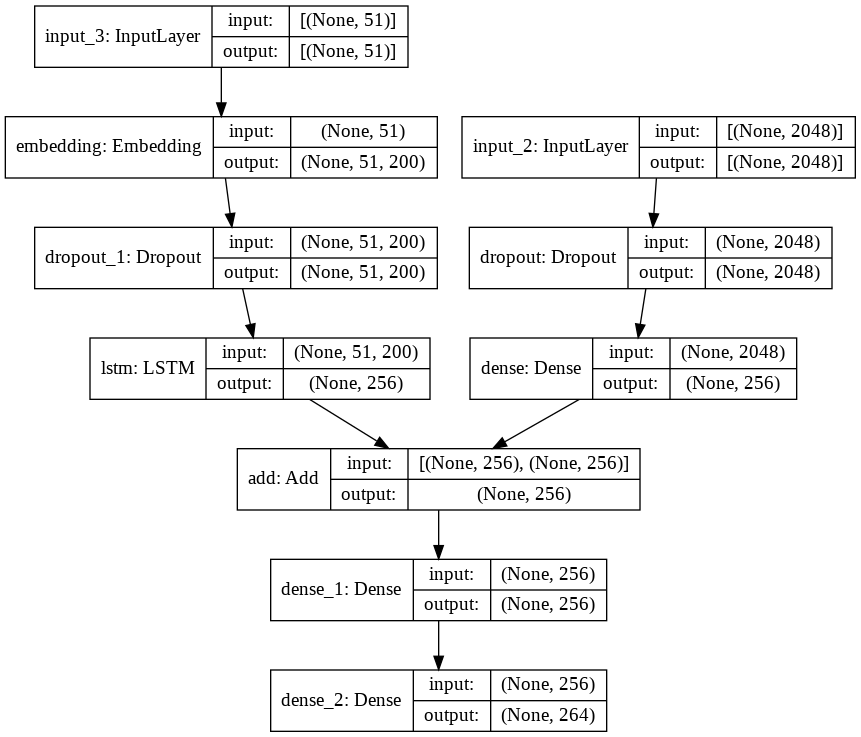

In [50]:
model.layers[2].set_weights([emb_matrix]) # structrure of netural network
model.layers[2].trainable = False
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=categorical_accuracy)
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

In [51]:
model.fit([X1, X2], y, epochs = 25, batch_size = 256)

Epoch 1/25
49/49 [==============================] - 10s 130ms/step - loss: 4.9632 - categorical_accuracy: 0.0757
Epoch 2/25
49/49 [==============================] - 6s 131ms/step - loss: 4.0111 - categorical_accuracy: 0.2156
Epoch 3/25
49/49 [==============================] - 6s 130ms/step - loss: 3.2514 - categorical_accuracy: 0.3299
Epoch 4/25
49/49 [==============================] - 6s 131ms/step - loss: 2.7645 - categorical_accuracy: 0.4050
Epoch 5/25
49/49 [==============================] - 6s 129ms/step - loss: 2.4257 - categorical_accuracy: 0.4527
Epoch 6/25
49/49 [==============================] - 6s 130ms/step - loss: 2.1861 - categorical_accuracy: 0.5032
Epoch 7/25
49/49 [==============================] - 6s 129ms/step - loss: 1.9777 - categorical_accuracy: 0.5364
Epoch 8/25
49/49 [==============================] - 6s 128ms/step - loss: 1.8245 - categorical_accuracy: 0.5705
Epoch 9/25
49/49 [==============================] - 6s 126ms/step - loss: 1.6683 - categorical_accuracy

In [55]:
def greedy_search(pic):
    start = 'startseq'
    for i in range(max_length):
        seq = [wordtoix[word] for word in start.split() if word in wordtoix]
        seq = pad_sequences([seq], maxlen = max_length)
        yhat = model.predict([pic, seq])
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        start += ' ' + word
        if word == 'endseq':
            break
    final = start.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

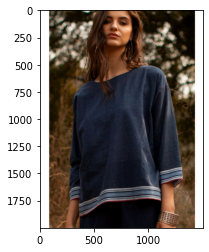

front top from will be great addition to your western wear collection as this top from the perfect to your western wear collection top from cotton fabric to be pattern jeans from gap of summer summer look from the season season top from the of with crew from jeans and


In [67]:
pic = list(encoding_train.keys())[100]
img = encoding_train[pic].reshape(1, 2048)
x = plt.imread(images + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))
